In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [4]:
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names

In [5]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [10]:
X_scaled= scaler.fit_transform(iris_data)

In [11]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

### apply PCA

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components = 2)

In [17]:
pca_scaled= pca.fit_transform(X_scaled)

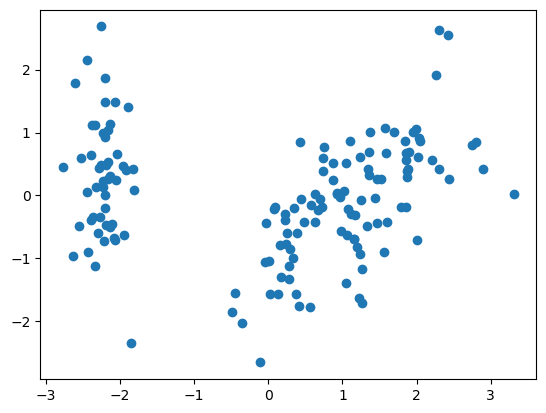

In [18]:
plt.scatter(pca_scaled[:,0], pca_scaled[:,1])

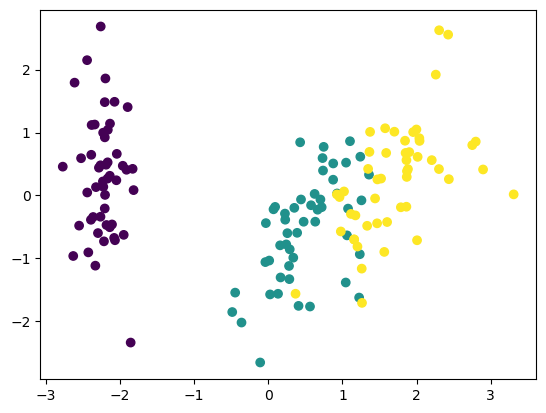

In [21]:
plt.scatter(pca_scaled[:,0], pca_scaled[:,1], c = iris.target)
# if we wana see how actually they are clusteres

### agglomerative clustering

In [22]:
## construct a dendogram

In [23]:
import scipy.cluster.hierarchy as sc

Text(0, 0.5, 'eucledian distance')

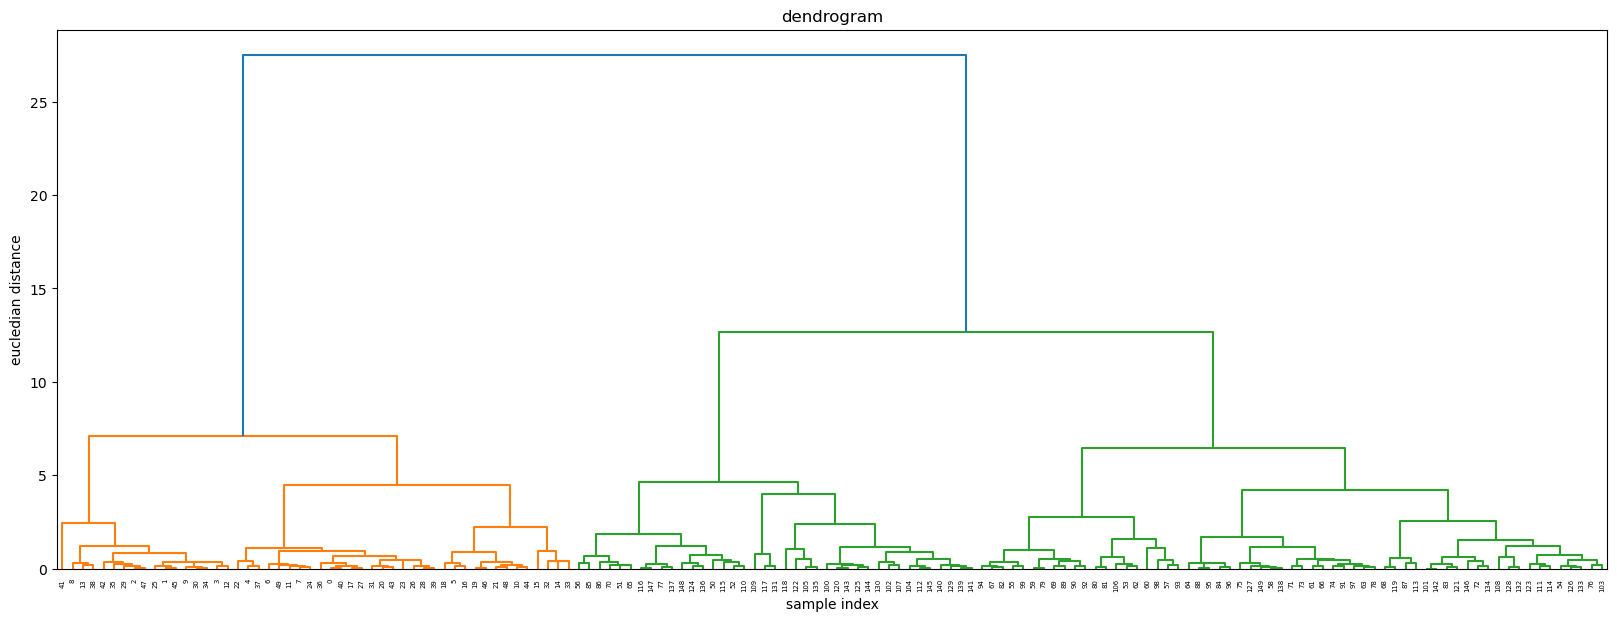

In [25]:
## plot dendogram
plt.figure(figsize = (20,7))
plt.title("dendrogram")

sc.dendrogram(sc.linkage(pca_scaled,method = 'ward'))
plt.xlabel("sample index")
plt.ylabel("eucledian distance")
# plt.show()

<h4> take the longest vertical line through which no horizontal line passes </h4>

In [27]:
from sklearn.cluster import AgglomerativeClustering

In [29]:
cluster = AgglomerativeClustering(n_clusters= 2,metric='euclidean',linkage = 'ward')

In [30]:
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [32]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

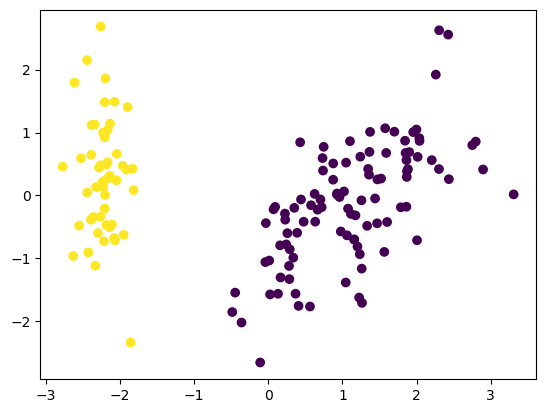

In [34]:
plt.scatter(pca_scaled[:,0] , pca_scaled[:,1], c = cluster.labels_)

In [35]:
## clusterinf saying two groups though data has 3 real groups 